In [1]:
#########################################################################################################
#                                  Trabalho Final de Métodos Estatísticos
#########################################################################################################

# Aluno: Cássio Danelon de Almeida
# Professores: Henrique Hippert
#              Eliane Christo

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import shapiro, kstest, chisquare, linregress, f_oneway, ttest_ind, chi2_contingency, levene
%matplotlib inline

In [3]:
lowbw = pd.read_table("lowbw.txt",delim_whitespace=True)
lowbw.head()

,id,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,85,Normal,19,182,Black,No,0,0,1,0,2523
1,86,Normal,33,155,Other,No,0,0,0,3,2551
2,87,Normal,20,105,White,Yes,0,0,0,1,2557
3,88,Normal,21,108,White,Yes,0,0,1,2,2594
4,89,Normal,18,107,White,Yes,0,0,1,0,2600


In [4]:
lowbw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
id       189 non-null int64
low      189 non-null object
age      189 non-null int64
lwt      189 non-null int64
race     189 non-null object
smoke    189 non-null object
ptl      189 non-null int64
ht       189 non-null int64
ui       189 non-null int64
ftv      189 non-null int64
bwt      189 non-null int64
dtypes: int64(8), object(3)
memory usage: 16.3+ KB


In [5]:
lowbw.describe()

,id,age,lwt,ptl,ht,ui,ftv,bwt
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,121.079365,23.238095,129.814815,0.195767,0.063492,0.148148,0.793651,2944.656085
std,63.303634,5.298678,30.579380,0.493342,0.244494,0.356190,1.059286,729.022417
min,4.000000,14.000000,80.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,68.000000,19.000000,110.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,123.000000,23.000000,121.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,176.000000,26.000000,140.000000,0.000000,0.000000,0.000000,1.000000,3475.000000
max,226.000000,45.000000,250.000000,3.000000,1.000000,1.000000,6.000000,4990.000000


0    159
1     24
2      5
3      1
Name: ptl, dtype: int64


Text(0.5,0,'plt')

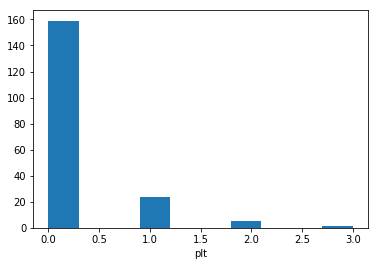

In [6]:
# 2.2.1 Descrição e Modelagem dos dados

# 1)
#ptl
print(lowbw['ptl'].value_counts())
plt.hist(lowbw['ptl'])
plt.xlabel('plt')

0    100
1     47
2     30
3      7
4      4
6      1
Name: ftv, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


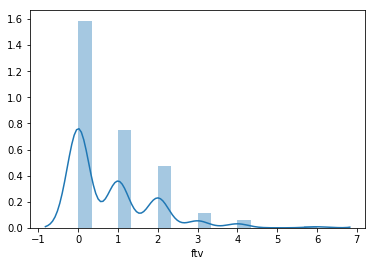

In [7]:
#ftv
print(lowbw['ftv'].value_counts())
sns.distplot(lowbw['ftv'])

Text(0.5,0,'ftv')

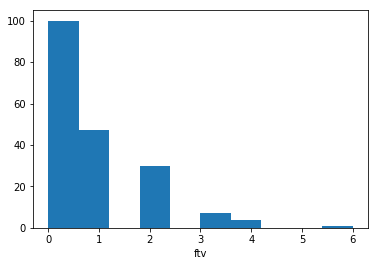

In [8]:
#ftv
plt.hist(lowbw['ftv'])
plt.xlabel('ftv')

Valor de Q computacional: 6.1529283824288115
P-valor 0.1044023988938132>0.05 Nao rejeita hipotese nula!


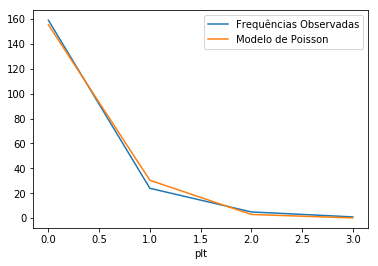

In [9]:
#2) Ajuste pelo modelo de Poisson

#Variável ptl

#frequencias observadas
o = np.array([159,24,5,1])

mu = (159*0+24*1+5*2+1*3)/189

#calculo do fatorial a ser utilizado na formula de Poisson
def fatorial(x):
    if(x==0 or x==1):
        return 1
    else:       
        return x*fatorial(x-1)
    
#frequencias esperadas    
poisson = np.zeros(len(o))
for i in range(len(o)):
    poisson[i] = (np.exp(-mu)*mu**i)/fatorial(i)
e = 189*poisson 

#Teste Qui-Quadrado
Chi = chisquare(o,e,axis=None)
print("Valor de Q computacional: {}".format(Chi[0]))
  
if(Chi[1]<0.05): 
    print("Rejeita-se Hipotese Nula")
else:
    print("P-valor {}>0.05 Nao rejeita hipotese nula!".format(Chi[1]))
    
z = np.linspace(0,3,4)
plt.plot(z,o,label='Frequências Observadas')
plt.plot(z,e,label='Modelo de Poisson')
plt.xlabel('plt')
plt.legend(loc='best')  

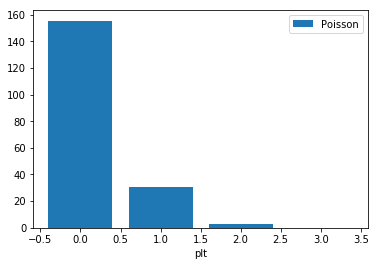

In [10]:
plt.bar(z,e,label='Poisson')
plt.xlabel('plt')
plt.legend(loc='best')

Valor de Q computacional: 16.644679391243898
Valor de p-valor: 0.005225380766264197
Rejeita-se Hipotese Nula


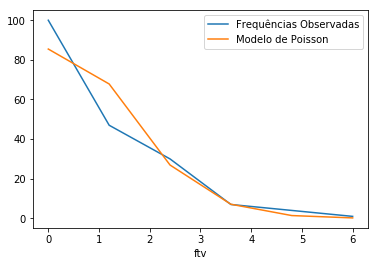

In [55]:
#Variável ftv

#frequencias observadas
o = np.array([100,47,30,7,4,1])

mu = (100*0+47*1+30*2+7*3+4*4+1*6)/189

#calculo do fatorial a ser utilizado na formula de Poisson
def fatorial(x):
    if(x==0 or x==1):
        return 1
    else:       
        return x*fatorial(x-1)
    
#frequencias esperadas    
poisson = np.zeros(len(o))
for i in range(len(o)):
    poisson[i] = (np.exp(-mu)*mu**i)/fatorial(i)
e = 189*poisson
 
#Teste Qui-Quadrado
Chi = chisquare(o,e,axis=None)
print("Valor de Q computacional: {}".format(Chi[0]))
print("Valor de p-valor: {}".format(Chi[1]))  
if(Chi[1]<0.05): 
    print("Rejeita-se Hipotese Nula")
else:
    print("P-valor {}>0.05 Nao rejeita hipotese nula!".format(Chi[1]))
    
z = np.linspace(0,6,6)
plt.plot(z,o,label='Frequências Observadas')
plt.plot(z,e,label='Modelo de Poisson')
plt.xlabel('ftv')
plt.legend(loc='best')

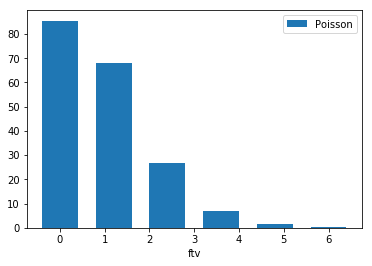

In [12]:
plt.bar(z,e,label='Poisson')
plt.xlabel('ftv')
plt.legend(loc='best')

Média:  129.8148148148148
Mediana:  121.0
Desvio Padrão:  30.579380352748768


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


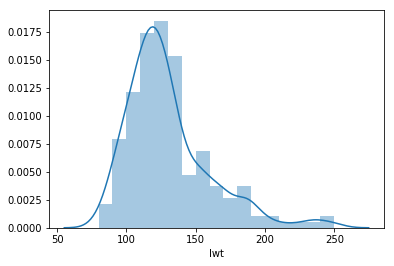

In [57]:
# 3)
#Variável #lwt
print('Média: ',lowbw['lwt'].mean())
print('Mediana: ',lowbw['lwt'].median())
print('Desvio Padrão: ',lowbw['lwt'].std())
sns.distplot(lowbw['lwt'])

Média:  2944.6560846560847
Mediana:  2977.0
Desvio Padrão:  729.0224168601321


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


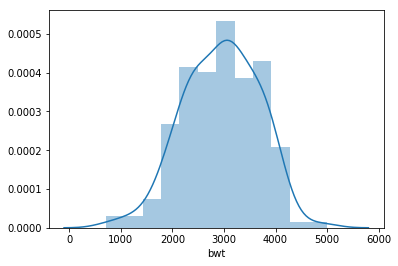

In [14]:
#Variável #bwt
print('Média: ',lowbw['bwt'].mean())
print('Mediana: ',lowbw['bwt'].median())
print('Desvio Padrão: ',lowbw['bwt'].std())
sns.distplot(lowbw['bwt'])

In [15]:
# Variável lwt é mais asssimétrica e apresenta uma dispersão menor do que a variável bwt

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0.8933119177818298, 2.2419691103614525e-10)
(0.1522529402257834, 1.583181900608058e-11)


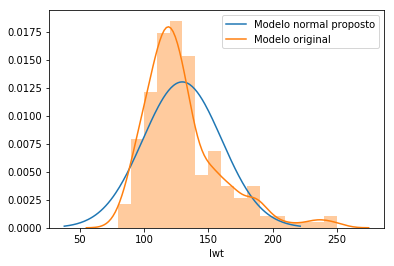

In [16]:
# 4)
#Variável lwt

import matplotlib.mlab as mlab
import math

#Ajuste do modelo normal
lwt = lowbw['lwt']
mu = lwt.mean()
sigma = lwt.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 189)
exp = mlab.normpdf(x, mu, sigma)
plt.plot(x,exp,label='Modelo normal proposto')
plt.legend(loc='best')
sns.distplot(lwt,kde_kws={"label": "Modelo original"})

# Teste de Aderência

# Teste de Normalidade
print(shapiro(lwt))
print(sm.stats.lilliefors(lwt))

In [17]:
# Nao pode ser ajustado pelo modelo normal

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0.9924667477607727, 0.4383845925331116)
(0.043483750201105786, 0.2)


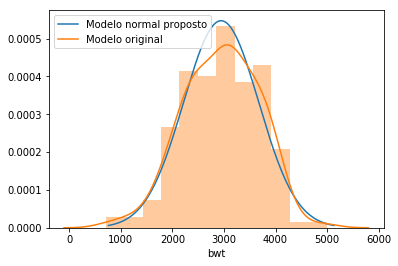

In [18]:
#Variável bwt

import matplotlib.mlab as mlab
import math

#Ajuste do modelo normal
bwt = lowbw['bwt']
mu = bwt.mean()
sigma = bwt.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 189)
exp = mlab.normpdf(x, mu, sigma)
plt.plot(x,exp,label='Modelo normal proposto')
sns.distplot(bwt,kde_kws={"label": "Modelo original"})
plt.legend(loc='best')

# Teste de Normalidade
print(shapiro(bwt))
print(sm.stats.lilliefors(bwt))

In [19]:
# Pode ser ajustado pelo modelo normal

In [20]:
# 2.2.2 Transformacoes e recodificacoes dos dados

lowbw = pd.read_table("lowbw.txt",delim_whitespace=True)
# a)

lwtkg = lowbw['lwt']*0.453
lowbw['lwtkg'] = lwtkg

In [21]:
# b)

#race2 = np.chararray((189,1),10,unicode=True)
race2 = np.zeros(189)
for i in range(189):
    if(lowbw['race'][i]=='White'):
        race2[i] = "0"
    elif(lowbw['race'][i]=='Black'):
        race2[i] = "1"
    elif(lowbw['race'][i]=='Other'):
        race2[i] = "1"
lowbw['race2'] = race2

In [22]:
# c)

ptl2 = np.zeros(189)
for i in range(189):
    if(lowbw['ptl'][i]==0):
        ptl2[i] = 0
    else:
         ptl2[i] = 1
lowbw['ptl2'] = ptl2

In [23]:
# d)

ftv2 = np.zeros(189)
for i in range(189):
    if(lowbw['ftv'][i]==0):
        ftv2[i] = 0
    else:
         ftv2[i] = 1
lowbw['ftv2'] = ftv2

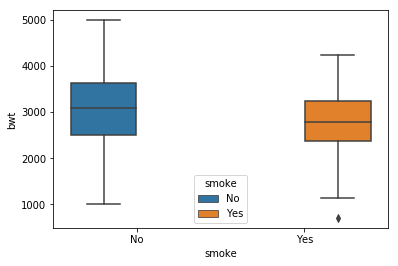

In [24]:
# 2.2.3 Análise usando bwt (variável quantitativa)

# smoke

sns.boxplot(x='smoke',y='bwt',hue='smoke',data=lowbw)

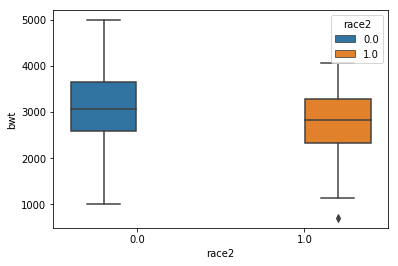

In [25]:
# race2

sns.boxplot(x='race2',y='bwt',hue='race2',data=lowbw)

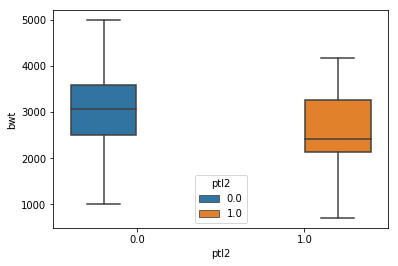

In [26]:
# ptl2

sns.boxplot(x='ptl2',y='bwt',hue='ptl2',data=lowbw)

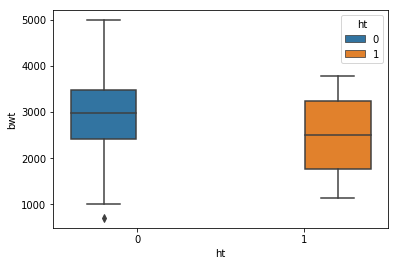

In [27]:
# ht

sns.boxplot(x='ht',y='bwt',hue='ht',data=lowbw)

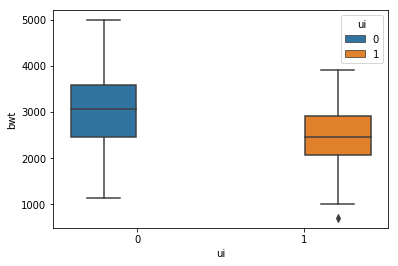

In [28]:
# ui

sns.boxplot(x='ui',y='bwt',hue='ui',data=lowbw)

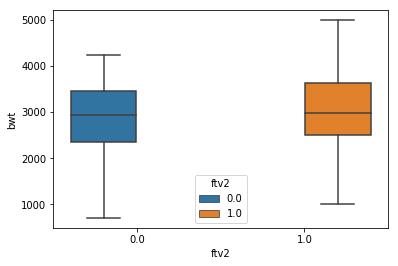

In [29]:
# ftv2

sns.boxplot(x='ftv2',y='bwt',hue='ftv2',data=lowbw)

In [30]:
# Os resultados fazem sentido, pois mostram como o comportamento da mãe durante a gravidez afeta o peso do bebê ao nascer.

In [31]:
# Diferença de Médias

# Variável smoke

fuma = lowbw[lowbw['smoke']=='Yes']['bwt']
nao_fuma = lowbw[lowbw['smoke']=='No']['bwt']
z = ztest(fuma,nao_fuma)
if(z[1]<0.05):
    print('Há diferença de média significativa')
else:
    print('Não rejeita-se hipótese nula')
print(z)

Há diferença de média significativa
(-2.6336039163601987, 0.008448397870304207)


In [32]:
# Variável ptl2

ptl = lowbw[lowbw['ptl2']==0]['bwt']
ptl1 = lowbw[lowbw['ptl2']==1]['bwt']
z = ztest(ptl,ptl1)
if(z[1]<0.05):
    print('Há diferença de média significativa')
else:
    print('Não rejeita-se hipótese nula')
print(z)

Há diferença de média significativa
(3.0576310890919585, 0.002230940389694913)


In [33]:
# Variável race2

branca = lowbw[lowbw['race2']==0]['bwt']
nao_branca = lowbw[lowbw['race2']==1]['bwt']
z = ztest(branca,nao_branca)
if(z[1]<0.05):
    print('Há diferença de média significativa')
else:
    print('Não rejeita-se hipótese nula')
print(z)

Há diferença de média significativa
(3.1178537944619165, 0.0018217315060564201)


In [34]:
# Variável ht

ht = lowbw[lowbw['ht']==0]['bwt']
ht1 = lowbw[lowbw['ht']==1]['bwt']
z = ztest(ht,ht1)
if(z[1]<0.05):
    print('Há diferença de média significativa')
else:
    print('Não rejeita-se hipótese nula')
print(z)

Há diferença de média significativa
(2.0192015645095878, 0.04346627379021054)


In [35]:
# Variável ui

ui = lowbw[lowbw['ui']==0]['bwt']
ui1 = lowbw[lowbw['ui']==1]['bwt']
z = ztest(ui,ui1)
if(z[1]<0.05):
    print('Há diferença de média significativa')
else:
    print('Não rejeita-se hipótese nula')
print(z)

Há diferença de média significativa
(4.04217005878041, 5.2958800963028457e-05)


In [36]:
# Variável ftv2

ftv = lowbw[lowbw['ftv']==0]['bwt']
ftv1 = lowbw[lowbw['ftv']==1]['bwt']
z = ztest(ftv,ftv1)
if(z[1]<0.05):
    print('Há diferença de média significativa')
else:
    print('Não rejeita-se hipótese nula')
print(z)

Não rejeita-se hipótese nula
(-1.8499356863868104, 0.06432281964759183)


In [37]:
# As variáveis ui(irritabilidade da urina) e raça apresentaram maior diferença

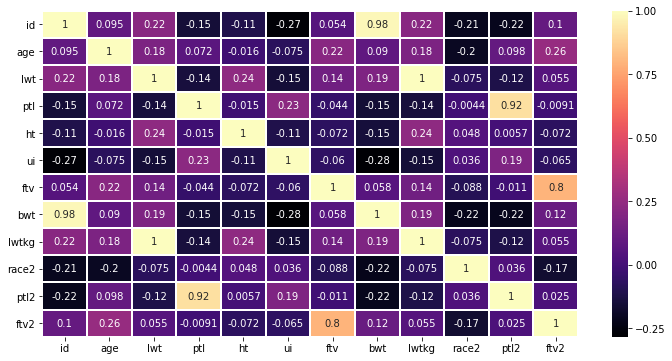

In [60]:
# 2.2.4 Análisando usando low

# Correlaçoes
plt.figure(figsize=(12,6))
sns.heatmap(lowbw.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [39]:
lowbw.corr()

,id,age,lwt,ptl,ht,ui,ftv,bwt,lwtkg,race2,ptl2,ftv2
id,1.000000,0.095043,0.215655,-0.151574,-0.112021,-0.269924,0.054185,0.981266,0.215655,-0.208425,-0.217723,0.102739
age,0.095043,1.000000,0.180073,0.071606,-0.015837,-0.075156,0.215394,0.089866,0.180073,-0.202555,0.098243,0.258367
lwt,0.215655,0.180073,1.000000,-0.140029,0.236360,-0.152763,0.140527,0.185789,1.000000,-0.074531,-0.116050,0.055082
ptl,-0.151574,0.071606,-0.140029,1.000000,-0.015400,0.227585,-0.044430,-0.154732,-0.140029,-0.004438,0.915971,-0.009119
ht,-0.112021,-0.015837,0.236360,-0.015400,1.000000,-0.108585,-0.072373,-0.146075,0.236360,0.047535,0.005655,-0.071760
ui,-0.269924,-0.075156,-0.152763,0.227585,-0.108585,1.000000,-0.059523,-0.283468,-0.152763,0.036412,0.185674,-0.065202
ftv,0.054185,0.215394,0.140527,-0.044430,-0.072373,-0.059523,1.000000,0.058262,0.140527,-0.088250,-0.011095,0.796293
bwt,0.981266,0.089866,0.185789,-0.154732,-0.146075,-0.283468,0.058262,1.000000,0.185789,-0.222295,-0.218208,0.115734
lwtkg,0.215655,0.180073,1.000000,-0.140029,0.236360,-0.152763,0.140527,0.185789,1.000000,-0.074531,-0.116050,0.055082
race2,-0.208425,-0.202555,-0.074531,-0.004438,0.047535,0.036412,-0.088250,-0.222295,-0.074531,1.000000,0.035857,-0.165246


In [40]:
# Tabelas

from tabulate import tabulate

fuma_normal = (lowbw[lowbw['low']=='Normal']['smoke']=='Yes')
headers = ['Peso','Fuma','Não Fuma']

In [41]:
smoke = pd.crosstab(lowbw['low'],lowbw['smoke'],margins=True)
print(smoke)
chi2_contingency(smoke)

smoke    No  Yes  All
low                  
Low      29   30   59
Normal   86   44  130
All     115   74  189


(4.923705434361292,
 0.29521575885389484,
 4,
 array([[ 35.8994709,  23.1005291,  59.       ],
        [ 79.1005291,  50.8994709, 130.       ],
        [115.       ,  74.       , 189.       ]]))

In [43]:
ptL = pd.crosstab(lowbw['low'],lowbw['ptl2'],margins=True)
print(ptL)
chi2_contingency(ptL)

ptl2    0.0  1.0  All
low                  
Low      41   18   59
Normal  118   12  130
All     159   30  189


(13.759047501906473,
 0.008105144571700773,
 4,
 array([[ 49.63492063,   9.36507937,  59.        ],
        [109.36507937,  20.63492063, 130.        ],
        [159.        ,  30.        , 189.        ]]))

In [59]:
ptL

ptl2,0.0,1.0,All
low,,,
Low,41,18,59
Normal,118,12,130
All,159,30,189


In [44]:
Race = pd.crosstab(lowbw['low'],lowbw['race2'],margins=True)
print(Race)
chi2_contingency(Race)

race2   0.0  1.0  All
low                  
Low      23   36   59
Normal   73   57  130
All      96   93  189


(4.787224655128904,
 0.30983437757816557,
 4,
 array([[ 29.96825397,  29.03174603,  59.        ],
        [ 66.03174603,  63.96825397, 130.        ],
        [ 96.        ,  93.        , 189.        ]]))

In [45]:
Ui = pd.crosstab(lowbw['low'],lowbw['ui'],margins=True)
print(Ui)
chi2_contingency(Ui)

ui        0   1  All
low                 
Low      45  14   59
Normal  116  14  130
All     161  28  189


(5.400765262740208,
 0.24859097516904627,
 4,
 array([[ 50.25925926,   8.74074074,  59.        ],
        [110.74074074,  19.25925926, 130.        ],
        [161.        ,  28.        , 189.        ]]))

In [58]:
Ui

ui,0,1,All
low,,,
Low,45,14,59
Normal,116,14,130
All,161,28,189


In [46]:
Ht = pd.crosstab(lowbw['low'],lowbw['ht'],margins=True)
print(Ht)
chi2_contingency(Ht)

ht        0   1  All
low                 
Low      52   7   59
Normal  125   5  130
All     177  12  189


(4.387954942213776,
 0.3560406124064324,
 4,
 array([[ 55.25396825,   3.74603175,  59.        ],
        [121.74603175,   8.25396825, 130.        ],
        [177.        ,  12.        , 189.        ]]))

In [47]:
Ftv = pd.crosstab(lowbw['low'],lowbw['ftv2'],margins=True)
print(Ftv)
chi2_contingency(Ftv)

ftv2    0.0  1.0  All
low                  
Low      36   23   59
Normal   64   66  130
All     100   89  189


(2.2626287154095186,
 0.6875810957471311,
 4,
 array([[ 31.21693122,  27.78306878,  59.        ],
        [ 68.78306878,  61.21693122, 130.        ],
        [100.        ,  89.        , 189.        ]]))

In [48]:
# 2.2.5  Análise de Variância

Race1 = lowbw[lowbw['race']=='White']['bwt']
Race2 = lowbw[lowbw['race']=='Black']['bwt']
Race3 = lowbw[lowbw['race']=='Other']['bwt']

print(shapiro(Race1))
print(shapiro(Race2))
print(shapiro(Race3))

print(levene(Race1,Race2))
print(levene(Race2,Race3))
print(levene(Race3,Race1))

(0.9872750043869019, 0.48643404245376587)
(0.9769612550735474, 0.803802490234375)
(0.975471556186676, 0.20706778764724731)
LeveneResult(statistic=0.8503209044647247, pvalue=0.3583118484970428)
LeveneResult(statistic=0.7711463610308392, pvalue=0.38217536365239446)
LeveneResult(statistic=0.0010889282593893798, pvalue=0.9737163287239314)


In [49]:
# Pode-se aplicar teste Anova, pois o mesmo será confiável

In [50]:
anova1 = f_oneway(Race1,Race2,Race3)
anova1

F_onewayResult(statistic=4.9718944104484235, pvalue=0.007879055861064493)

In [51]:
# Há diferenças significativas nas médias

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(lowbw['bwt'],lowbw['race'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper   reject
------------------------------------------------
Black  Other  84.3226  -305.5271 474.1723 False 
Black  White  384.0473  11.0227  757.0719  True 
Other  White  299.7247   31.128  568.3213  True 
------------------------------------------------


In [53]:
# Não há diferença tão significativa entre raças não brancas, porém há diferença significativa entre raça branca e não branca

LinregressResult(slope=9.777623639581746, intercept=2369.672062504214, rvalue=0.18578870880181367, pvalue=0.010480719288092102, stderr=3.7815113855038547)
LinregressResult(slope=12.364331853776473, intercept=2657.3325634826124, rvalue=0.08986638934514724, pvalue=0.21878982951353368, stderr=10.020554693346558)


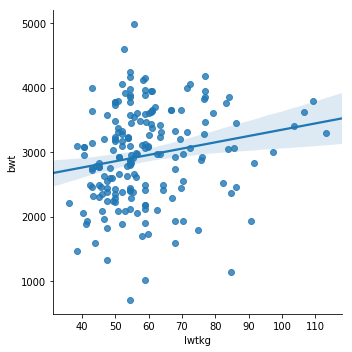

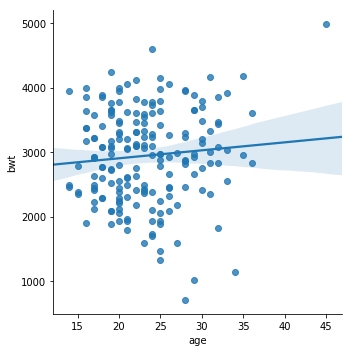

In [54]:
# 2.2.6 Correlação e Regressão

# Variável lwtkg

sns.lmplot('lwtkg','bwt',data=lowbw)
LR = linregress(lowbw['lwtkg'],lowbw['bwt'])
print(LR)
# Variável age

sns.lmplot('age','bwt',data=lowbw)
LR2 = linregress(lowbw['age'],lowbw['bwt'])
print(LR2)